In [5]:
%run data_loader.ipynb

white wine columns Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
read wine None
<class 'pandas.core.frame.Data

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from collections import Counter

features = wines.iloc[:,:-3]
feature_names = list(features.columns)
class_labels = np.array(wines['wine_type'])
X_train, X_test, y_train, y_test = train_test_split(features, class_labels,
                                                   test_size = 0.3, random_state=42)
print(Counter(y_train), Counter(y_test))
print('Features:', feature_names) 


Counter({'white': 3418, 'red': 1129}) Counter({'white': 1480, 'red': 470})
Features: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


## Feature Scaling

In [28]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler().fit(X_train)
print(ss)
SX_train = ss.transform(X_train)
SX_test = ss.transform(X_test)
print(X_train.head(3))
print(SX_train[0:3,:])

StandardScaler(copy=True, with_mean=True, with_std=True)
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
3761            6.7              0.19         0.32             3.7      0.041   
3740            9.0              0.45         0.49             2.6      0.084   
1359            6.4              0.24         0.25            20.2      0.083   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
3761                 26.0                  76.0  0.99173  2.90       0.57   
3740                 21.0                  75.0  0.99870  3.35       0.57   
1359                 35.0                 157.0  0.99976  3.17       0.50   

      alcohol  
3761     10.5  
3740      9.7  
1359      9.1  
[[ -3.96500416e-01  -9.18356151e-01   6.90600374e-03  -3.58795605e-01
   -4.28481943e-01  -2.58585398e-01  -6.97890732e-01  -9.79252442e-01
   -1.98134631e+00   2.49610131e-01  -2.11449267e-03]
 [  1.35969508e+00   6.75108259e-01   1.17501800e+0

In [29]:
lr = LogisticRegression()
lr.fit(SX_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [34]:
lr_predictions = lr.predict(SX_test)
print(lr_predictions[:3])

['white' 'white' 'white']


In [39]:
%run evaluation.ipynb
display_model_performance_metrics(true_labels=y_test, predicted_labels=lr_predictions,
                                 classes=['red', 'white'])

Model Performance metrics:
------------------------------
Accuracy: 0.9923
Precision: 0.9923
Recall: 0.9923
F1 Score: 0.9923

Model Classification report:
------------------------------
labels ['red', 'white']
             precision    recall  f1-score   support

        red       0.98      0.99      0.98       470
      white       1.00      0.99      0.99      1480

avg / total       0.99      0.99      0.99      1950


Prediction Confusion Matrix:
------------------------------
              Predicted:      
                     red white
Actual: red          463     7
        white          8  1472


In [41]:
le=LabelEncoder()
le.fit(y_train)
ey_train = le.transform(y_train)
ey_test = le.transform(y_test)

In [47]:
from keras.models import Sequential
from keras.layers import Dense
dnn_model = Sequential()
dnn_model.add(Dense(16, activation='relu', input_shape=(11,)))
dnn_model.add(Dense(16, activation='relu'))
dnn_model.add(Dense(16, activation='relu'))
dnn_model.add(Dense(1, activation='sigmoid'))
dnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [54]:
history=dnn_model.fit(SX_train, ey_train, epochs=10, batch_size=5,
             shuffle=True, validation_split=0.1, verbose=1)

Train on 4092 samples, validate on 455 samples
Epoch 1/10
4092/4092 [==============================] - 1s 252us/step - loss: 0.0103 - acc: 0.9976 - val_loss: 0.0050 - val_acc: 1.0000
Epoch 2/10
4092/4092 [==============================] - 1s 249us/step - loss: 0.0111 - acc: 0.9976 - val_loss: 0.0014 - val_acc: 1.0000
Epoch 3/10
4092/4092 [==============================] - 1s 257us/step - loss: 0.0100 - acc: 0.9973 - val_loss: 0.0020 - val_acc: 1.0000
Epoch 4/10
4092/4092 [==============================] - 1s 255us/step - loss: 0.0092 - acc: 0.9976 - val_loss: 0.0012 - val_acc: 1.0000
Epoch 5/10
4092/4092 [==============================] - 1s 254us/step - loss: 0.0080 - acc: 0.9983 - val_loss: 0.0018 - val_acc: 1.0000
Epoch 6/10
4092/4092 [==============================] - 1s 252us/step - loss: 0.0088 - acc: 0.9983 - val_loss: 9.7426e-04 - val_acc: 1.0000
Epoch 7/10
4092/4092 [==============================] - 1s 265us/step - loss: 0.0086 - acc: 0.9985 - val_loss: 0.0018 - val_acc: 1.00

In [55]:
dnn_ypred=dnn_model.predict_classes(SX_test)
dnn_predictions = le.inverse_transform(dnn_ypred)

In [56]:
display_model_performance_metrics(true_labels=y_test, predicted_labels=dnn_predictions,
                                 classes=['red', 'white'])

Model Performance metrics:
------------------------------
Accuracy: 0.9944
Precision: 0.9944
Recall: 0.9944
F1 Score: 0.9944

Model Classification report:
------------------------------
labels ['red', 'white']
             precision    recall  f1-score   support

        red       0.99      0.99      0.99       470
      white       1.00      1.00      1.00      1480

avg / total       0.99      0.99      0.99      1950


Prediction Confusion Matrix:
------------------------------
              Predicted:      
                     red white
Actual: red          463     7
        white          4  1476


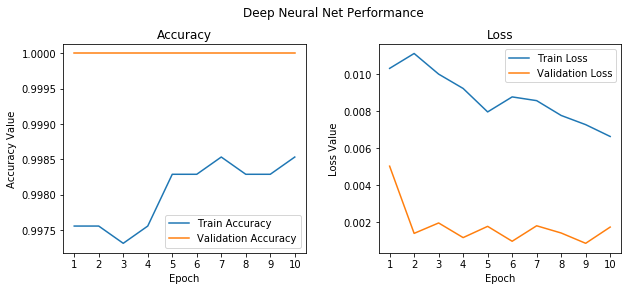

In [57]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
t = f.suptitle('Deep Neural Net Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epochs = list(range(1,11))
ax1.plot(epochs, history.history['acc'], label='Train Accuracy')
ax1.plot(epochs, history.history['val_acc'], label='Validation Accuracy')
ax1.set_xticks(epochs)
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epochs, history.history['loss'], label='Train Loss')
ax2.plot(epochs, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(epochs)
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

## Feature importance

In [61]:
from skater.core.explanations import Interpretation
from skater.model import InMemoryModel


[11/11] features ████████████████████ Time elapsed: 0 seconds

(<matplotlib.figure.Figure at 0x128c50390>,
 <matplotlib.axes._subplots.AxesSubplot at 0x128cb05f8>)

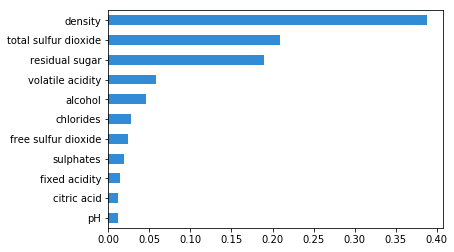

In [65]:
interpreter = Interpretation(SX_test, feature_names=features.columns)
im_model = InMemoryModel(lr.predict_proba, examples=SX_train,
                                     target_names=lr.classes_)
interpreter.feature_importance.plot_feature_importance(im_model, ascending=False)

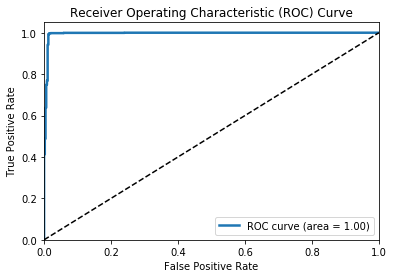

In [66]:
plot_model_roc_curve(lr, SX_test, y_test)

In [71]:
feature_indices = [i for i, feature in enumerate(feature_names) 
                   if feature in ['density', 'total sulfur dioxide']]

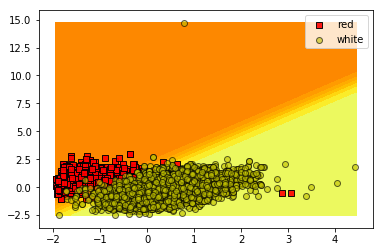

In [72]:
plot_model_decision_surface(clf=lr, train_features=SX_train[:, feature_indices],
                          train_labels=y_train, plot_step=0.02,   
                          cmap=plt.cm.Wistia_r, markers=[',', 'o'],
                          alphas=[0.9, 0.6], colors=['r', 'y'])